# Chapter 2

In the text book, you could use download_root and fetch_housing() method 
to pull down data from raw.githubusercontent.com/ageron/handson-me/master

However, since the data is here in the "/Handson_Machinelearning datasets housing", 
we can jump to import pandas and load housing data step directly



In [92]:
import pandas as pd
import os
import tarfile

# path 
Housing_path = "datasets/housing"

def load_housing_data( housing_path = Housing_path ):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


load the data, check the first 5 rows

In [93]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [94]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* All other colums are numerical, except the ocean_proximity. 
We could use value_counts() method to find out a summary of all categories in this colum:

In [95]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

* the describe() method will show summary of all numerical colums:

In [96]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



# now let's try to plot some figures based on the dataset we have

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F838BE7860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F83A8E9A90>]], dtype=object)

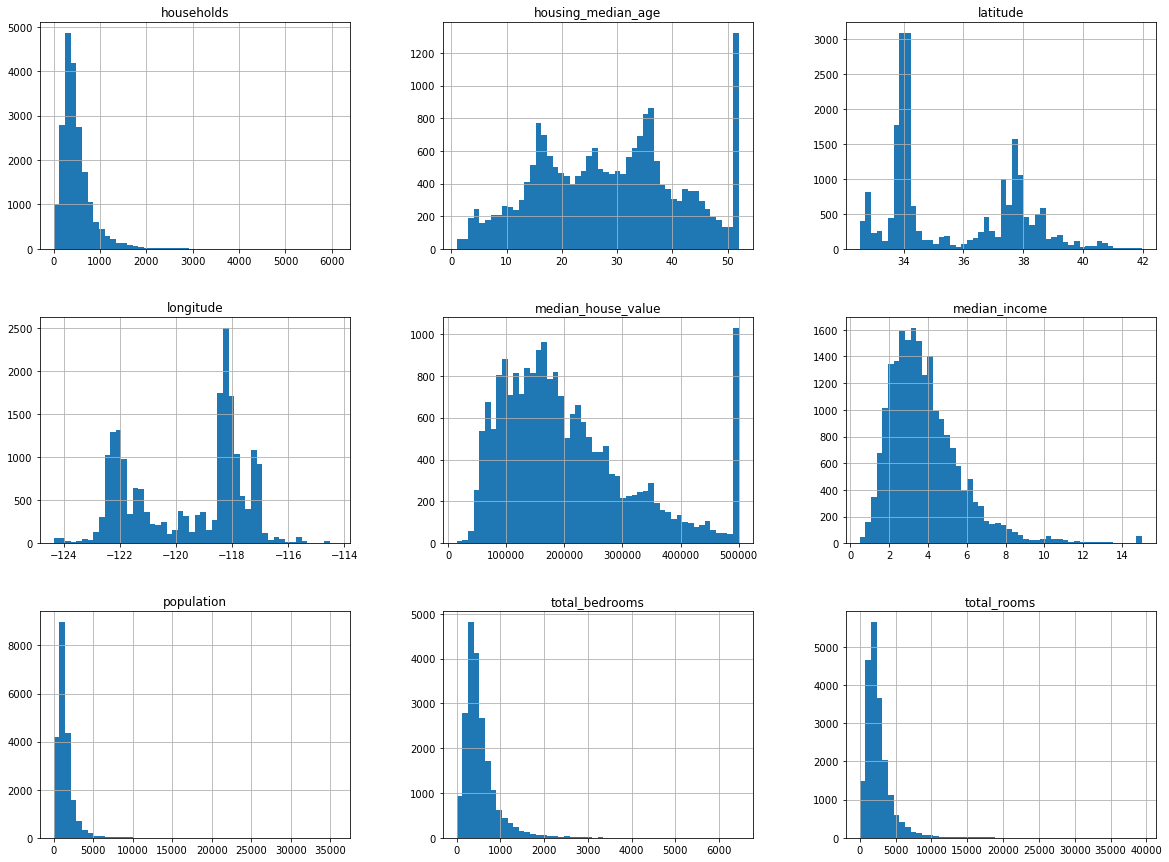

In [97]:
%matplotlib inline 

import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize = (20, 15))



# now we have a closeup sense about the data we have
The next sttep should be spliting our dataset into training and testing sets

In [98]:
import numpy as np

def split_train_test(data, test_ratio):
    # shuffle the original dataset
    shuffled_indices = np.random.permutation( len(data) )
    # get the test dataset size
    test_set_size = int(len(data) * test_ratio)
    
    # split the shuffled dataset 
    test_indices = shuffled_indices[ : test_set_size] 
    train_indices = shuffled_indices[test_set_size: ] 
    
    return data.iloc[ train_indices], data.iloc[test_indices] 

In [99]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), " train + " , len(test_set), " test ")

16512  train +  4128  test 


The code above will split the dataset, randomly. 
to get a constant splited subsamplesets, using np.random.seed(123) might do the job
however, after we fetching more datasets to the existing dataset, we would lost the pattern.
So, using hashlib to split the unique id would solve the proble:
    * generate a unique id
    * generate corresponding hash number for each unique id
    * only keep the last 3 digits of the hash number
    * if it is greater than 51 (~20% of 256), that entry belongs to training set
    * if it is smalled than 51 (~80% of 256), that entry belongs to test set

In [100]:

import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash( np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]




In [101]:
housing["id"] = housing.index


In [102]:
housing_with_id = housing.reset_index()
housing_with_id.head()
# housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [103]:
# now let's split the housing_with_id

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

print( len(train_set), "train + " , len(test_set) , " test. ")

16362 train +  4278  test. 



# import sklearn 

In [104]:
from sklearn.model_selection import train_test_split

print( len(train_set), "train + " , len(test_set) , " test. ")

train_set, test_set = train_test_split( housing, test_size = 0.2, random_state = 123)

print( len(train_set), "train + " , len(test_set) , " test. ")

16362 train +  4278  test. 
16512 train +  4128  test. 


## double check here 

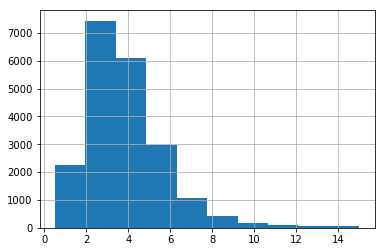

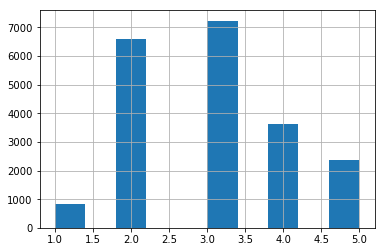

In [105]:

housing["median_income"].hist( ) 
plt.show()

housing["income_cat"] = np.ceil( housing["median_income"] / 1.5 )

housing["income_cat"].where( housing["income_cat"] < 5, 5.0, inplace = True) 

housing["income_cat"].hist() 

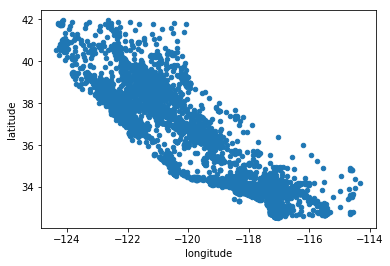

In [106]:



housing.plot( kind = "scatter", x = "longitude", y = "latitude")

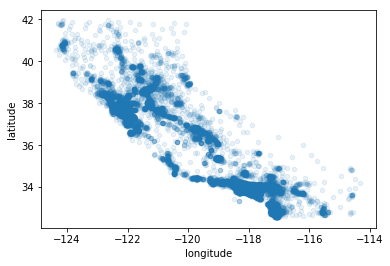

In [107]:


housing.plot( kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

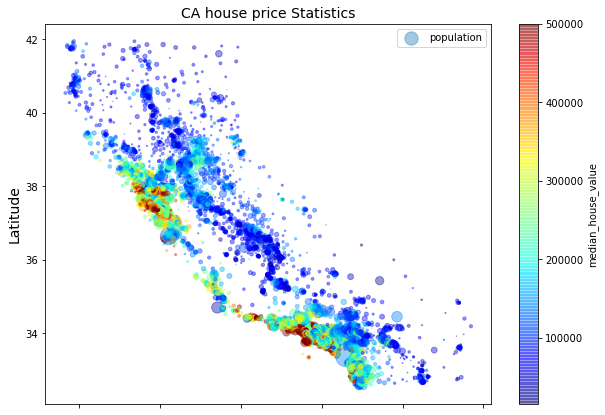

In [108]:


housing.plot( kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = housing["population"]/100, label = "population", figsize = (10, 7), 
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
#plt.imshow( extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.title("CA house price Statistics", fontsize = 14)
plt.xlabel("Longitude", fontsize = 14)
plt.ylabel("Latitude", fontsize = 14)
plt.legend()
plt.show()

In [109]:

## correlation
corr_matrix = housing.corr()


In [110]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
id                    0.072086
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

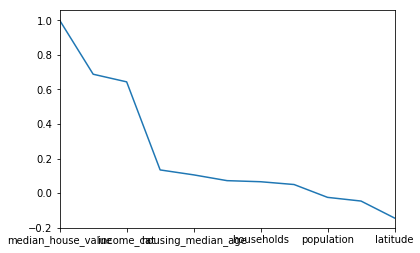

In [111]:
corr_matrix["median_house_value"].sort_values(ascending = False).plot()

# housing.hist(bins = 50, figsize = (20, 15))
# corr_matrix.plot( bins = 50, figsize = (20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8336D2860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F83D3FDD68>]], dtype=object)

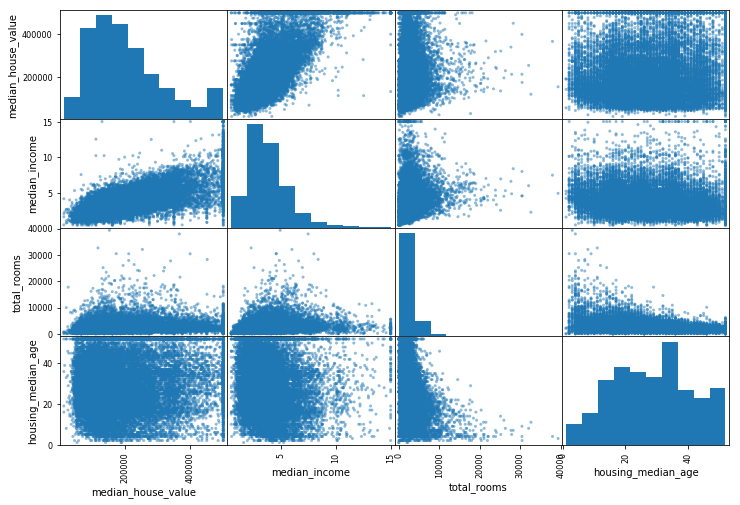

In [112]:


from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"] 

scatter_matrix(housing[attributes], figsize=(12, 8))

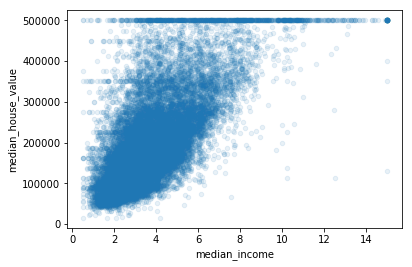

In [113]:
housing.plot( kind = "scatter", x="median_income", y="median_house_value", alpha = 0.1)


# Experimenting with Attribute Combinations 


In [114]:

housing["rooms_per_household"] = housing["total_rooms"] / housing["households"] 

housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"] 

housing["population_per_household"] = housing["population"] / housing["households"]


In [115]:

corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
id                          0.072086
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## cleaning data

separate the predictors and the labels, 
because we donot necessarily want to apply the same transformations to the predictors and the target values() 


In [ ]:

housing = strat_train_set.drop("median_house_value", axis = 1)

housing_labels = strat_train_set["median_house_value"].copy() 


In [117]:
housing.dropna( subset = ["total_bedrooms"])  # option 1
housing.drop("total_bedrooms", axis = 1)      # option 2
median  =  housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace = True ) 


In [118]:
from sklearn.preprocessing import Imputer 

imputer = Imputer( strategy = "median" )


In [119]:
housing_num = housing.drop("ocean_proximity", axis = 1)

imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [120]:
imputer.statistics_

array([ -1.18490000e+02,   3.42600000e+01,   2.90000000e+01,
         2.12700000e+03,   4.35000000e+02,   1.16600000e+03,
         4.09000000e+02,   3.53480000e+00,   1.79700000e+05,
         1.03195000e+04,   3.00000000e+00,   5.22912879e+00,
         2.03162434e-01,   2.81811565e+00])

In [121]:
housing_num.median().values

array([ -1.18490000e+02,   3.42600000e+01,   2.90000000e+01,
         2.12700000e+03,   4.35000000e+02,   1.16600000e+03,
         4.09000000e+02,   3.53480000e+00,   1.79700000e+05,
         1.03195000e+04,   3.00000000e+00,   5.22912879e+00,
         2.03162434e-01,   2.81811565e+00])

In [122]:


X = imputer.transform(housing_num)

In [123]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)